In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['Simhei']  #显示中文
plt.rcParams['axes.unicode_minus']=False    #显示负号  

In [55]:
import os
path='../pic' #创建图片文件
os.makedirs(path,exist_ok=True) 

# 获取当前目录下的所有文件
file_list = [f for f in os.listdir() if os.path.isfile(f)]

# 按文件的最后修改时间进行排序，从上到下依次是从早到晚
sorted_file_list = sorted(file_list, key=lambda x: os.path.getmtime(x))

# 打印所有文件名
for file_name in sorted_file_list:
    if file_name[-3:]=='Spe':
        print(file_name)



512.Spe
512-2.Spe
2048.Spe
2048-2.Spe


In [56]:
# 打开ASCII文件
def read_data(name):
    with open(name, 'r') as file:
        # 使用'your_file.txt'替换为实际文件的路径和名称
        # 'r' 表示以只读模式打开文件
        # 逐行读取文件内容
        data=[]
        for (i,line) in enumerate(file):
            if (i>=12) and (i<=523):
                data.append(int(line.strip()))
                # print(line)  # 示例：打印每一行的内容
    return np.array(data)

def findDNL(Ndata):
    Nmean=Ndata.mean()
    deviation = np.abs(Ndata -Nmean)

    max_index = deviation.argmax()

    # 找到偏离均值最大的元素的值
    max_deviation_value = deviation[max_index]
    DNL=max_deviation_value/Nmean
    return DNL,Nmean,max_index


def mydraw(filename,channel=(50,450), title='计数-道址', x_label='道址', y_label='计数',xrange=(), yrange=(),yscale=None,mode=(1,1), save=''):
    a,b=channel
    Ndata=read_data(filename)[a:b+1]
    dao=np.arange(512)[a:b+1]
    (DNL,Nmean,index)=findDNL(Ndata)
    # 创建一个图形
    if mode[0]:
        plt.figure(figsize=(16, 4))
        plt.axhline(Nmean, color='r', linestyle='--',label='平均计数')
        # 绘制CH1的数据
        plt.plot(dao, Ndata, color='blue')

        plt.xlabel(x_label)
        plt.ylabel(y_label)
        if yscale!=None:
            plt.yscale(yscale)

        plt.title(title)

        if len(xrange) != 0:
            xmin, xmax = xrange
            plt.xlim(xmin, xmax)
        if len(yrange) != 0:
            ymin, ymax = yrange
            plt.ylim(ymin, ymax)

        plt.grid(True)
        plt.legend()

        if save != '':
            plt.savefig(path+'/plot'+save, bbox_inches='tight')

        plt.show()
    if mode[1]:

        plt.figure(figsize=(12, 4))
        plt.axhline(Nmean, color='r', linestyle='--',label='平均计数')
        # 绘制CH1的数据
        plt.bar(dao, Ndata, color='blue',width=1)
        plt.xlabel(x_label)
        plt.ylabel(y_label)
        if yscale!=None:
            plt.yscale(yscale)

        plt.title(title)

        if len(xrange) != 0:
            xmin, xmax = xrange
            plt.xlim(xmin, xmax)
        if len(yrange) != 0:
            ymin, ymax = yrange
            plt.ylim(ymin, ymax)

        plt.grid(True)
        plt.legend()

        if save != '':
            plt.savefig(path+'/bar'+save, bbox_inches='tight')

        plt.show()


    return Ndata,(Nmean,DNL)


In [57]:
a=read_data('2048.Spe')
a[476:512]

array([2577,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0])

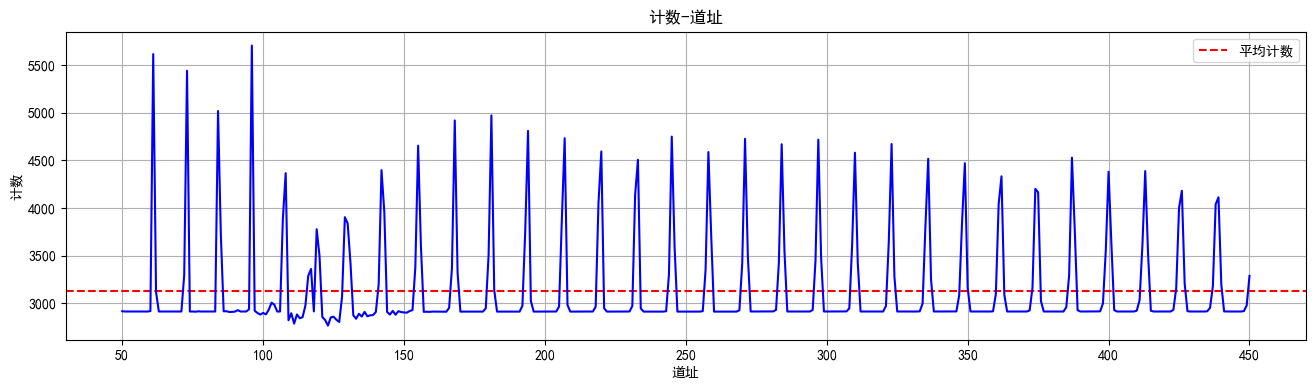

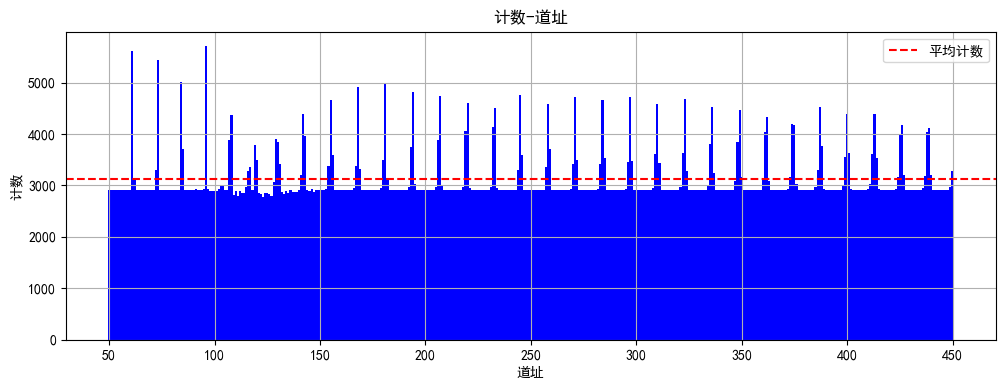

(3131.650872817955, 0.8220421853300547)

In [58]:
(data,DNL)=mydraw('512.Spe',save='512_1.pdf')
DNL

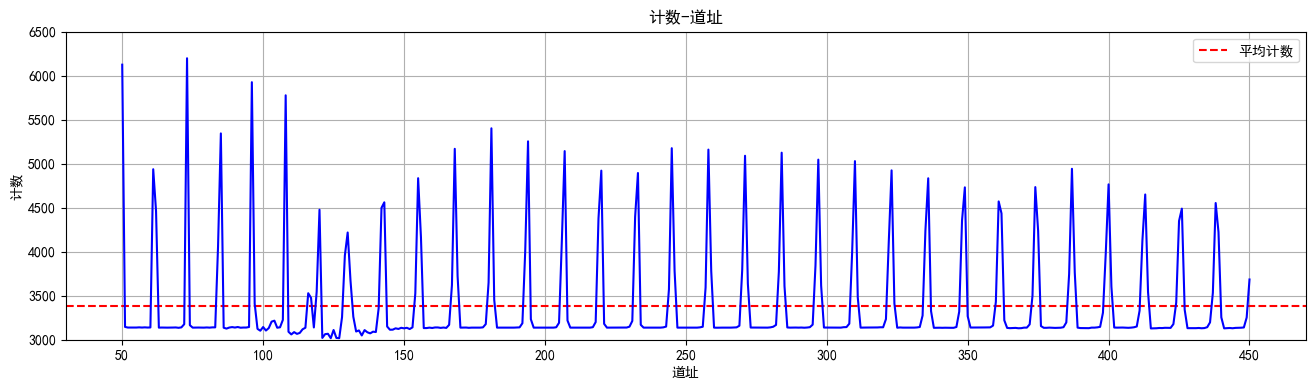

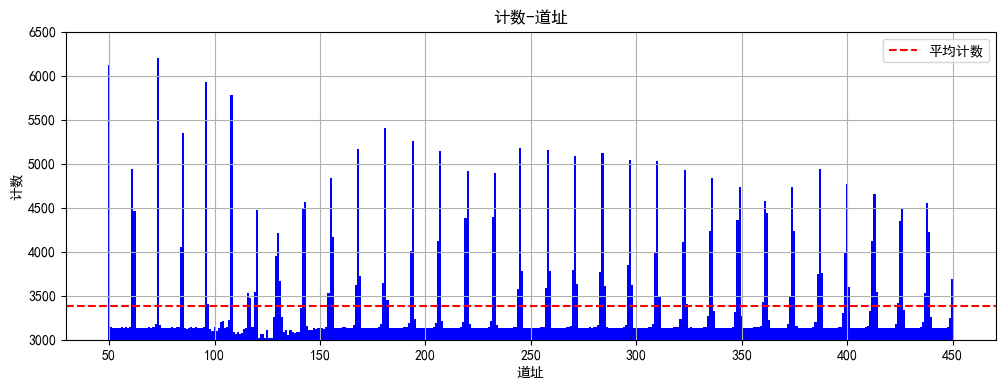

(3378.865336658354, 0.8340476410133403)

In [77]:
(data,DNL)=mydraw('512-2.Spe',save='512_2.pdf',yrange=(3000,6500))
DNL

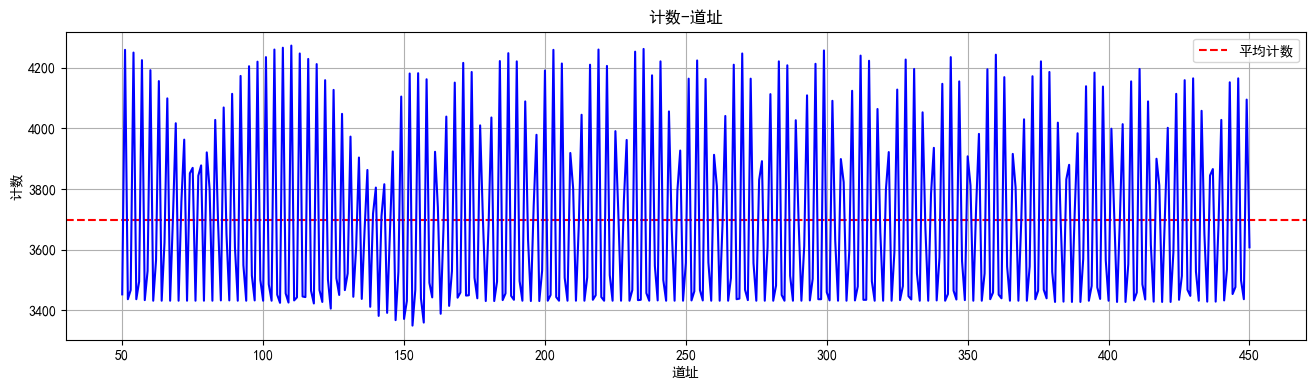

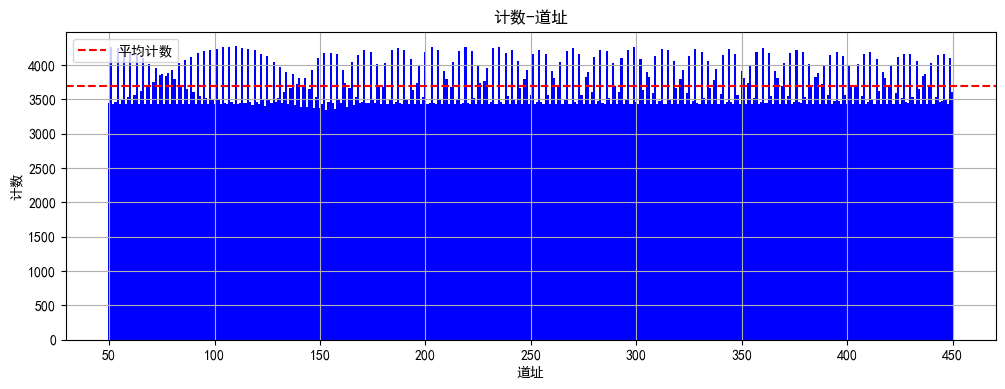

(3698.6857855361595, 0.15527521064636426)

In [60]:
(data,DNL)=mydraw('2048.Spe',save='2048_1.pdf')
DNL

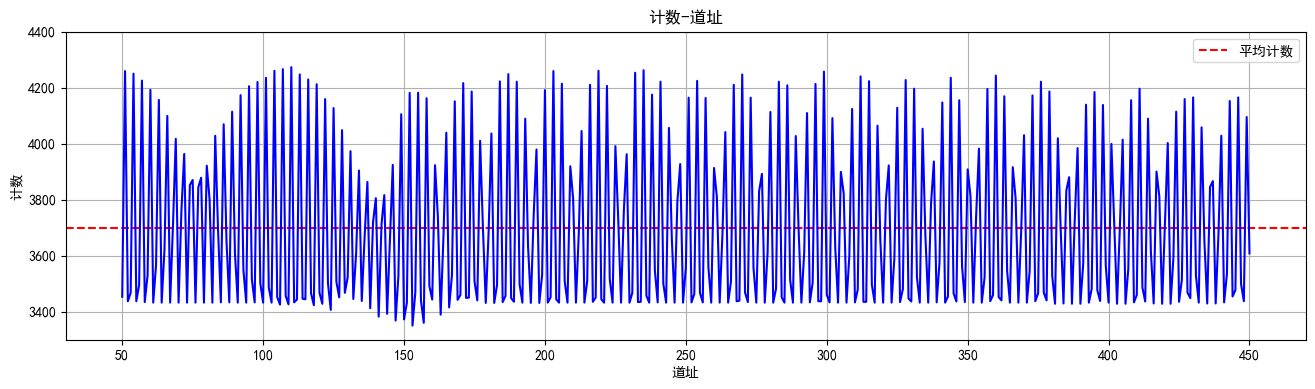

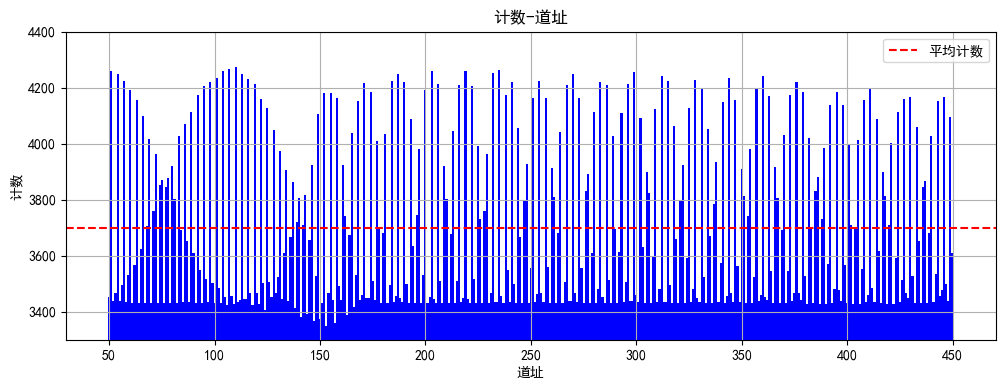

(3698.6857855361595, 0.15527521064636426)

In [80]:
(data,DNL)=mydraw('2048.Spe',save='2048_2.pdf',yrange=(3300,4400))
DNL

# 模拟实验

In [62]:
def rectangular_pulse(a,b,h,Duty=50,phase=90,N=1000):
    Duty=Duty/100
    phase=phase/360
    t=np.linspace(a,b,N)
    a1=a+(b-a)*phase
    b1=a+(b-a)*(phase+Duty)
    pulst=np.zeros_like(t)
    for i,v in enumerate(t):
        if (v>=a1)and(v<b1):
            pulst[i]=h
    return t,pulst

# rectangular_pulse(0,1,1,N=20)

In [63]:
dao=np.arange(10)
# dao[3:8]

In [67]:
def mydraw2(Ndata,a,b, title='计数-道址', x_label='道址', y_label='单周期计数',xrange=(), yrange=(),yscale=None, save=''):
    dao=np.arange(Ndata.shape[0])

    Ndata=Ndata[a:b+1]
    dao=dao[a:b+1]
    (DNL,Nmean,index)=findDNL(Ndata)
    # 创建一个图形
    # if mode[1]:

    plt.figure(figsize=(8, 4))
    plt.axhline(Nmean, color='r', linestyle='--',label='平均计数')
    # 绘制CH1的数据
    plt.bar(dao, Ndata, color='blue',width=0.9)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    if yscale!=None:
        plt.yscale(yscale)

    plt.title(title)

    if len(xrange) != 0:
        xmin, xmax = xrange
        plt.xlim(xmin, xmax)
    plt.xticks(np.arange(a, b+1, 1))
    if len(yrange) != 0:
        ymin, ymax = yrange
        plt.ylim(ymin, ymax)

    plt.grid(True)
    plt.legend(loc='upper left')

    if save != '':
        plt.savefig(save, bbox_inches='tight')

    plt.show()


    return Nmean,DNL

def measureADC(channel_num,pulse_num,vaild_inverval=(2,5),save=None):
    plt.figure(figsize=(8, 4))

    # 绘制CH1的数据
    count=np.zeros(channel_num)
    for i in range(pulse_num):
        pulse_height=(i+1)*channel_num/pulse_num
        pulse_channel=int(pulse_height+0.5)
        if pulse_channel>=channel_num:
            pulse_channel=channel_num-1
        count[pulse_channel]+=1

        x,y=rectangular_pulse(i,i+1,pulse_height)
        plt.plot(x, y, color='blue')

    for i in range(channel_num):
        plt.axhline(y=i+0.5, color='r', linestyle='--')

    plt.xlabel("时间/单位时间")
    plt.ylabel("幅度")
    # if yscale!=None:
    #     plt.yscale(yscale)

    plt.title("输入滑移脉冲幅度和道址的对应关系")

    # if len(xrange) != 0:
    #     xmin, xmax = xrange
    #     plt.xlim(xmin, xmax)
    # if len(yrange) != 0:
    #     ymin, ymax = yrange
    #     plt.ylim(ymin, ymax)

    plt.grid(True)
    # plt.legend()

    if save:
        plt.savefig(path+f'/show_{channel_num}channels_{pulse_num}_pluses.pdf', bbox_inches='tight')
        save=path+f'/count_{channel_num}channels_{pulse_num}_pluses.pdf'
    else:
        save=''
    plt.show()
    a,b=vaild_inverval
    (mealvaule,DNL)=mydraw2(count,a,b,save=save)
    return mealvaule,DNL


def measureADC_nopic(channel_num,pulse_num,vaild_inverval=(2,5)):

    # 绘制CH1的数据
    count=np.zeros(channel_num)
    for i in range(pulse_num):
        pulse_height=(i+1)*channel_num/pulse_num
        pulse_channel=int(pulse_height+0.5)
        if pulse_channel>=channel_num:
            pulse_channel=channel_num-1
        count[pulse_channel]+=1
    a,b=vaild_inverval
    (DNL,Nmean,max_index)=findDNL(count[a:b+1])
 

    # (mealvaule,DNL)=mydraw2(count,3,6,save=save)
    return DNL

使用5个滑移脉冲测量8道ADC


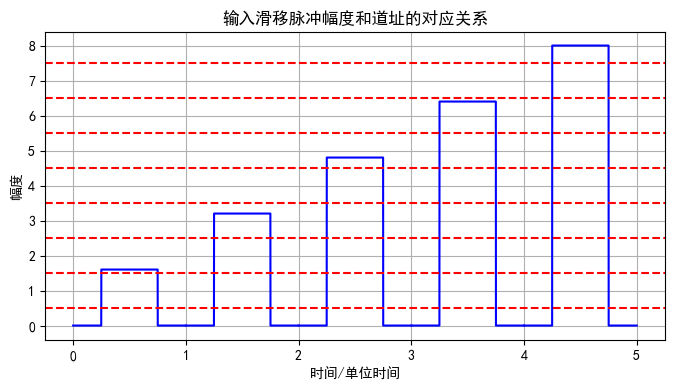

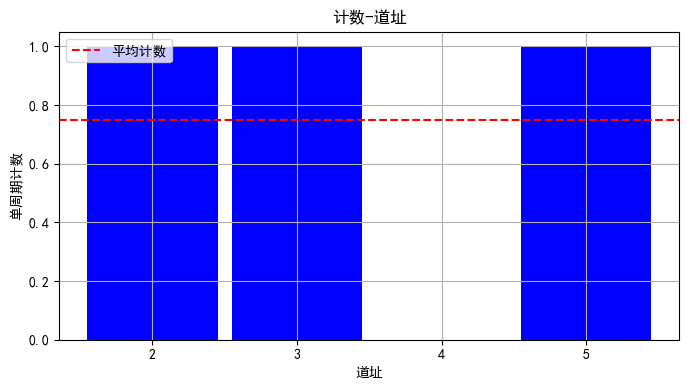

均值为0.75，非线性性为1.0
-----------------------------
使用9个滑移脉冲测量8道ADC


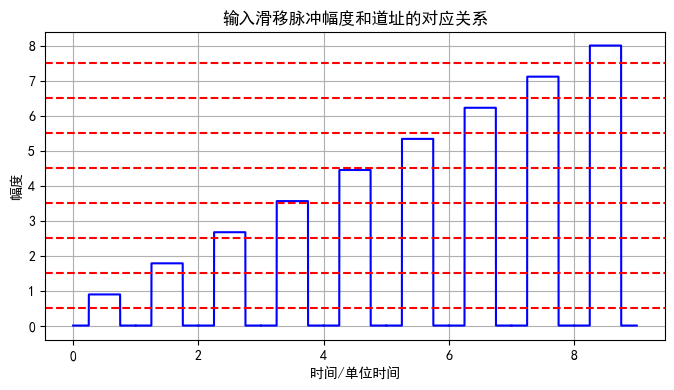

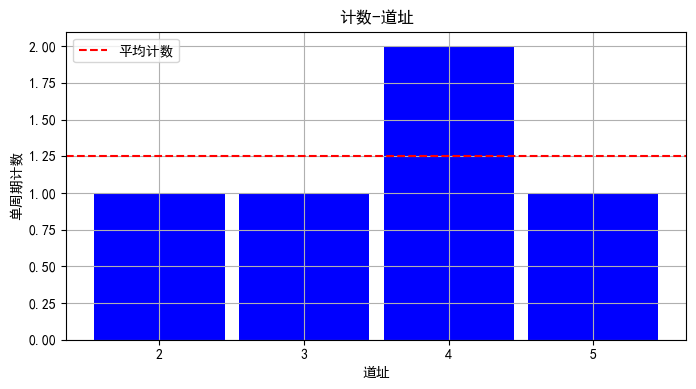

均值为1.25，非线性性为0.6
-----------------------------
使用20个滑移脉冲测量8道ADC


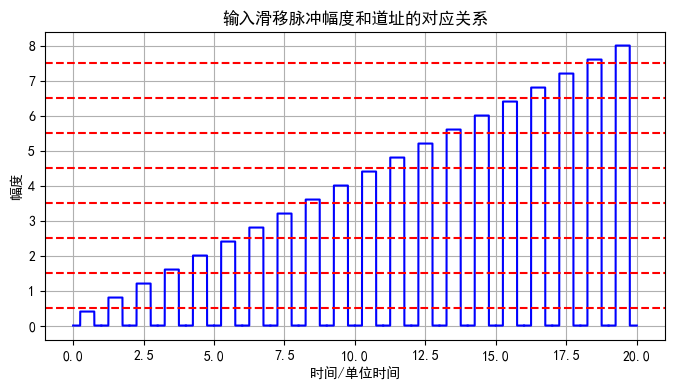

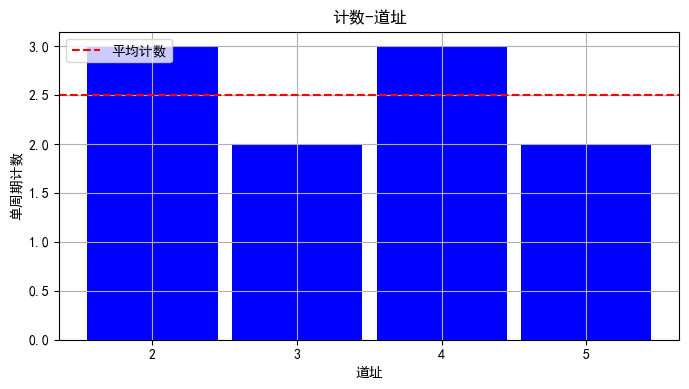

均值为2.5，非线性性为0.2
-----------------------------
使用8个滑移脉冲测量8道ADC


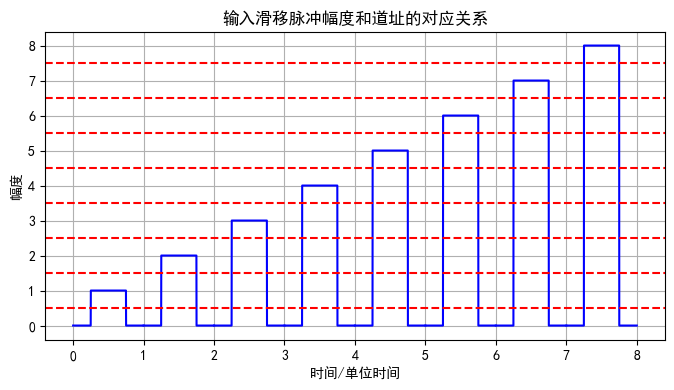

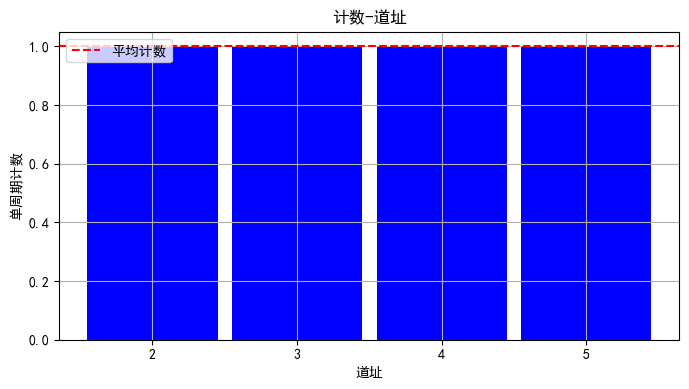

均值为1.0，非线性性为0.0
-----------------------------
使用16个滑移脉冲测量8道ADC


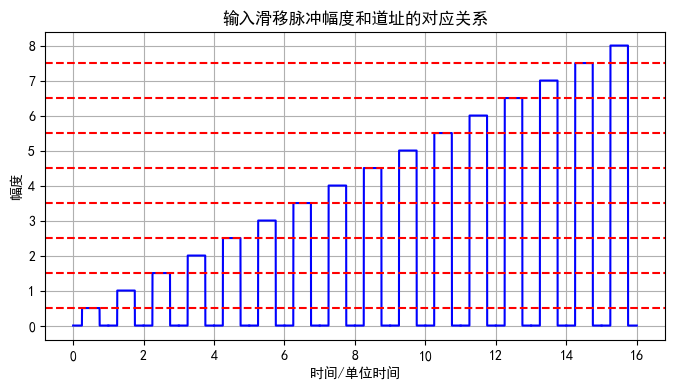

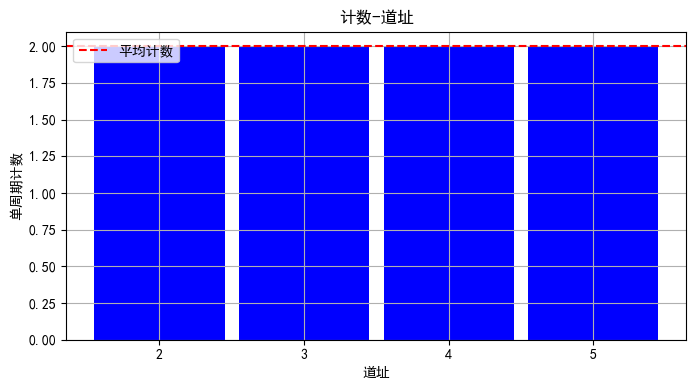

均值为2.0，非线性性为0.0
-----------------------------


In [71]:
# measureADC(8,10)
DNL_list=[]
# pulsenum1=5
# pulsenum2=20
# pulsenum_list=np.arange(pulsenum1,pulsenum2+1)
# for i in range(pulsenum1,pulsenum2+1):
for i in (5,9,20):
    print(f'使用{i}个滑移脉冲测量8道ADC')
    (mealvaule,DNL)=measureADC(8,i,save=True,vaild_inverval=(2,5))
    DNL_list.append(DNL)
    print(f'均值为{mealvaule}，非线性性为{DNL}')
    print('-----------------------------')

for i in (8,16):
    print(f'使用{i}个滑移脉冲测量8道ADC')
    (mealvaule,DNL)=measureADC(8,i,save=True,vaild_inverval=(2,5))
    DNL_list.append(DNL)
    print(f'均值为{mealvaule}，非线性性为{DNL}')
    print('-----------------------------')


[0.03296703296703297, 0.03296703296703297, 0.03296703296703297, 0.0, 0.03225806451612903, 0.03225806451612903, 0.03225806451612903, 0.02127659574468085, 0.02127659574468085, 0.031578947368421054, 0.0, 0.0, 0.0, 0.030927835051546393, 0.02040816326530612, 0.02040816326530612, 0.030303030303030304, 0.030303030303030304, 0.030303030303030304, 0.0]


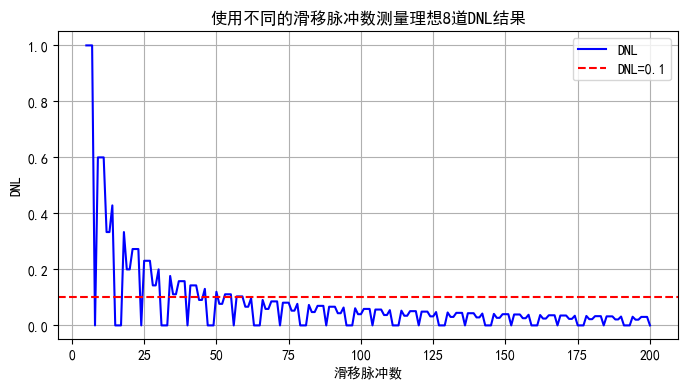

In [90]:
DNL_list=[]
pulsenum1=5
pulsenum2=200
pulsenum_list=np.arange(pulsenum1,pulsenum2+1)
for i in range(pulsenum1,pulsenum2+1):
    # print(f'使用{i}个滑移脉冲测量8道ADC')
    DNL=measureADC_nopic(8,i)
    DNL_list.append(DNL)

print(DNL_list[-20:])
plt.figure(figsize=(8, 4))
# plt.axhline(Nmean, color='r', linestyle='--',label='平均计数')
# 绘制CH1的数据
plt.plot(pulsenum_list,DNL_list, color='blue',label='DNL')
plt.axhline(0.1, color='r', linestyle='--',label='DNL=0.1')

plt.xlabel('滑移脉冲数')
plt.ylabel('DNL')
# plt.yscale('log')
# if yscale!=None:
#     plt.yscale(yscale)

plt.title("使用不同的滑移脉冲数测量理想8道DNL结果")

# if len(xrange) != 0:
#     xmin, xmax = xrange
#     plt.xlim(xmin, xmax)
# plt.xticks(np.arange(a, b+1, 1))
# if len(yrange) != 0:
#     ymin, ymax = yrange
#     plt.ylim(ymin, ymax)

plt.grid(True)
plt.legend(loc='upper right')

plt.savefig("../pic/DNL_curve.pdf", bbox_inches='tight')

plt.show()